# Convolucion

La convolución en el dominio del tiempo para dos señales discretas se puede realizar siguiendo este proceso:

1. Invertir una de las señales (comúnmente el filtro o respuesta al impulso).
2. Deslizar la señal invertida a través de la otra señal, multiplicando y sumando en cada paso.

El algoritmo matemáticamente se describe como:

$$
[ y[n] = \sum_{k=-\infty}^{\infty} x[k] \cdot h[n-k] ]
$$

Donde:
- $( y[n] ) $ es la salida (señal convolucionada).
- $( x[k] )$ es nuestra señal original.
- $( h[n-k] )$ es nuestra señal invertida y desplazada.

A continuación, implementaré una función que realiza la convolución de dos señales en el dominio del tiempo:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

from scipy.signal import convolve
from scipy.fft import fft, ifft
from scipy.signal import TransferFunction, impulse

In [2]:
def convolucion(x, h):
    #Longitud de las senales
    len_x = len(x)
    len_h = len(h)

    # Crear un array de ceros para almacenar el resultado de la convolucion
    y = np.zeros(len_x + len_h - 1)

    # Proceso de convolucion
    for n in range(len(y)):
        for k in range(len_x):
            if n - k >= 0 and n - k < len_h:
                y[n] += x[k] * h[n - k]

    return y

### Prueba del Scratch

<StemContainer object of 3 artists>

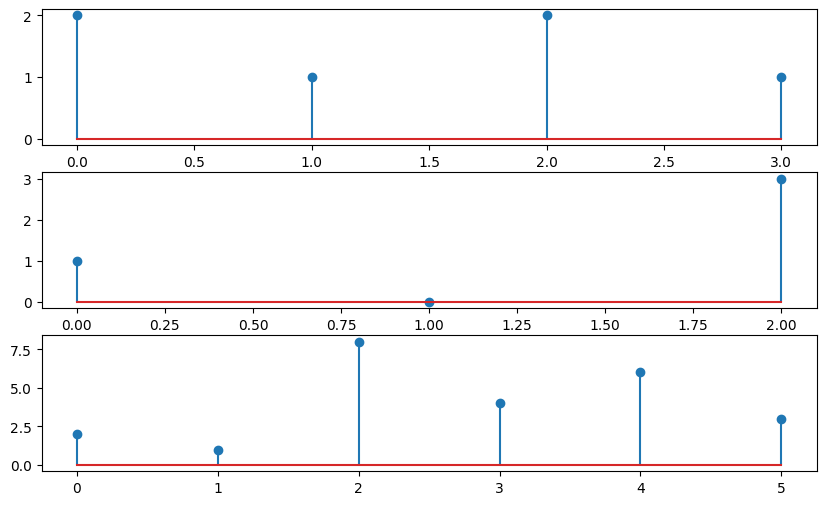

In [3]:
x = [2, 1, 2, 1]
h = [1, 0, 3]

y = convolucion(x,h)

plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
plt.stem(x)
plt.subplot(3,1,2)
plt.stem(h)
plt.subplot(3,1,3)
plt.stem(y)

# Prueba usando libreria

<StemContainer object of 3 artists>

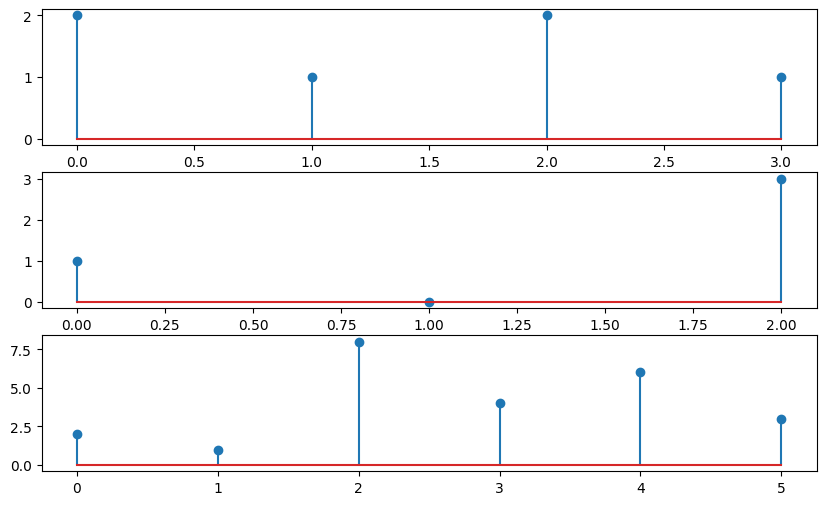

In [4]:
x = [2, 1, 2, 1]
h = [1, 0, 3]

y = convolve(x,h)

plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
plt.stem(x)
plt.subplot(3,1,2)
plt.stem(h)
plt.subplot(3,1,3)
plt.stem(y)

## Prueba con dos senales cuadradas

<StemContainer object of 3 artists>

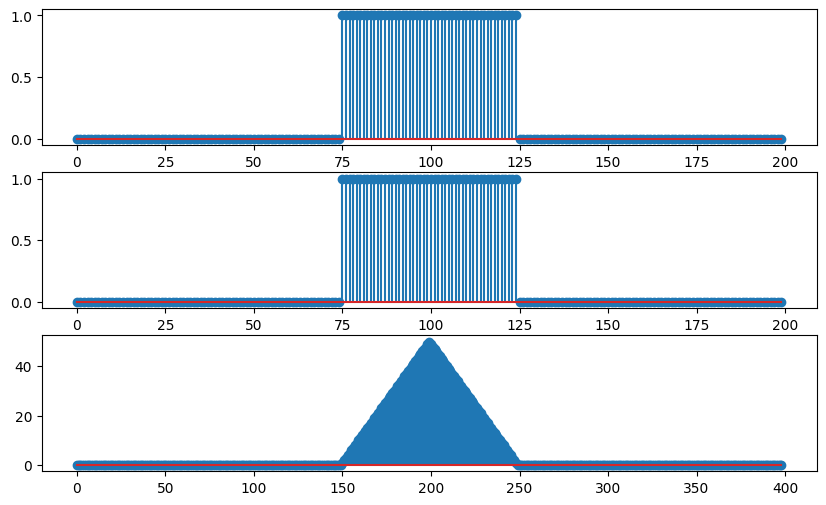

In [5]:
x = np.zeros(200)
x[75:125] = np.ones(50)
h = np.zeros(200)
h[75:125] = np.ones(50)

y = convolve(x,h)

plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
plt.stem(x)
plt.subplot(3,1,2)
plt.stem(h)
plt.subplot(3,1,3)
plt.stem(y)

## Prueba senal mas grande con una pequena

<StemContainer object of 3 artists>

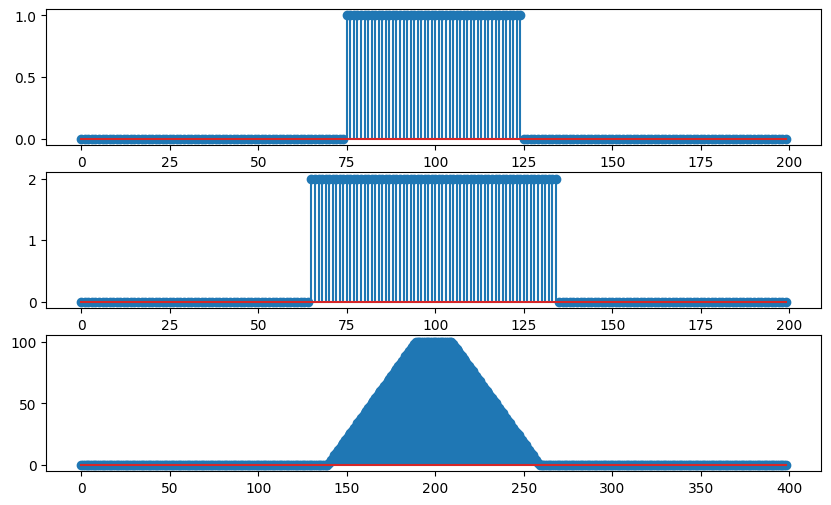

In [6]:
x = np.zeros(200)
x[75:125] = np.ones(50)
h = np.zeros(200)
h[65:135] = 2*np.ones(70)

y = convolve(x,h)

plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
plt.stem(x)
plt.subplot(3,1,2)
plt.stem(h)
plt.subplot(3,1,3)
plt.stem(y)

## Ejemplo usando FFT

/var/folders/89/43ylvgyx5hj4v_z5nn_dl1980000gn/T/ipykernel_5116/1109469535.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  y[0:int(N/2)] = y_[int(N/2):N]
/var/folders/89/43ylvgyx5hj4v_z5nn_dl1980000gn/T/ipykernel_5116/1109469535.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  y[int(N/2):N] = y_[0:int(N/2)]


<StemContainer object of 3 artists>

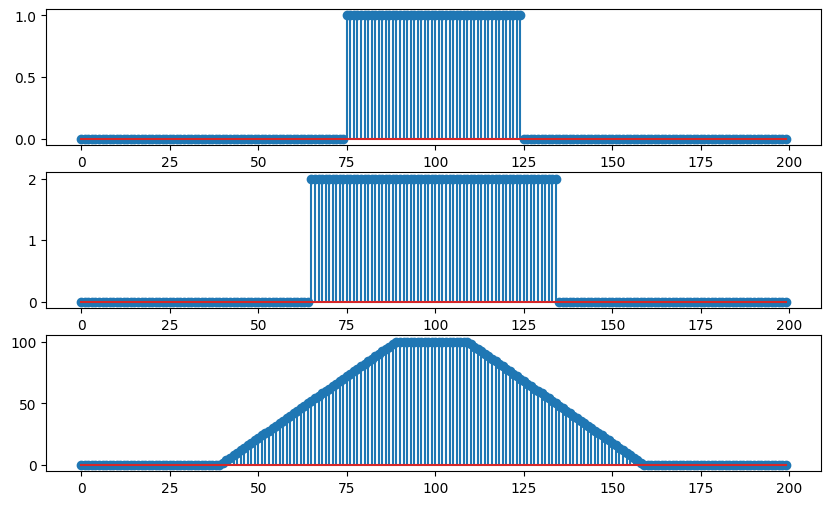

In [7]:
X_ = fft(x)
H_ = fft(h)

Y_ = X_*H_

y_ = ifft(Y_)
N = len(y_)
y = np.zeros(N)
y[0:int(N/2)] = y_[int(N/2):N]
y[int(N/2):N] = y_[0:int(N/2)]

plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
plt.stem(x)
plt.subplot(3,1,2)
plt.stem(h)
plt.subplot(3,1,3)
plt.stem(np.real(y))

## Senal cuadrada y triangular

<StemContainer object of 3 artists>

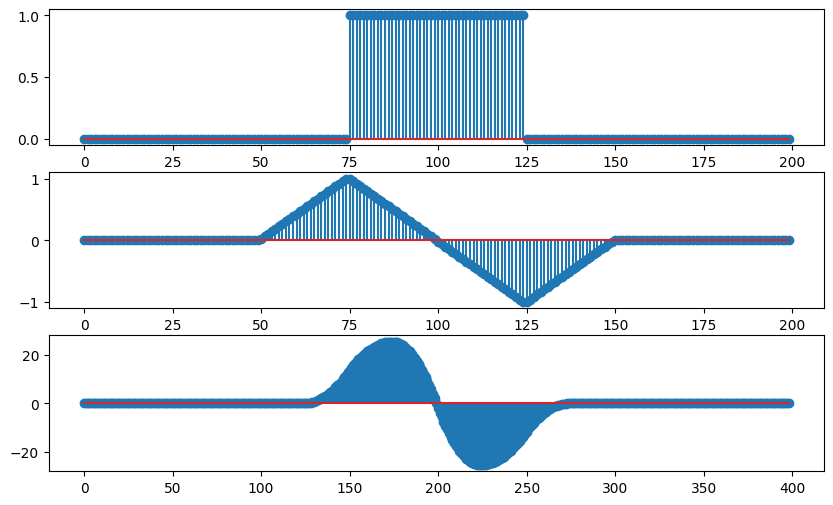

In [8]:
t = np.linspace(-1,1,50)
x = np.zeros(200)
x[75:125] = np.ones(50)
h = np.zeros(200)
h[50:75] = t[25:50]
h[75:125] = -t[0:50]
h[125:150] = t[0:25]

y = convolucion(x,h)

plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
plt.stem(x)
plt.subplot(3,1,2)
plt.stem(h)
plt.subplot(3,1,3)
plt.stem(y)

# Ejemplo usando transformada de fourier

/var/folders/89/43ylvgyx5hj4v_z5nn_dl1980000gn/T/ipykernel_5116/1109469535.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  y[0:int(N/2)] = y_[int(N/2):N]
/var/folders/89/43ylvgyx5hj4v_z5nn_dl1980000gn/T/ipykernel_5116/1109469535.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  y[int(N/2):N] = y_[0:int(N/2)]


<StemContainer object of 3 artists>

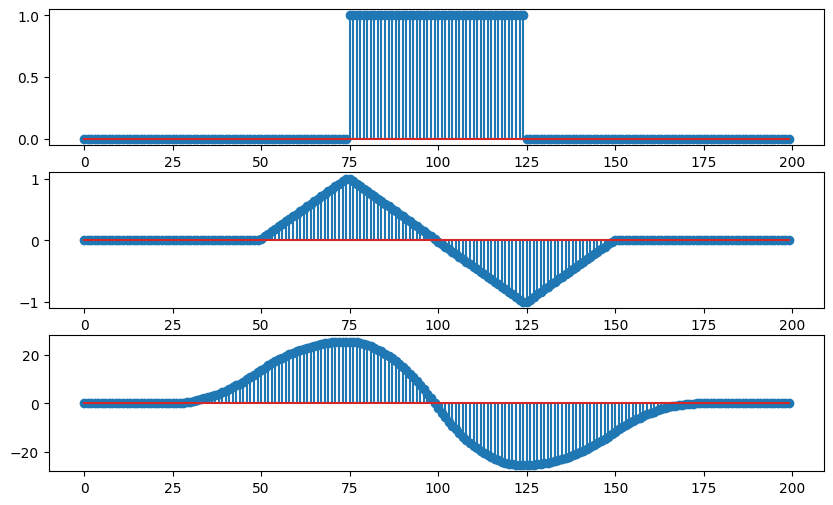

In [9]:
X_ = fft(x)
H_ = fft(h)

Y_ = X_*H_

y_ = ifft(Y_)
N = len(y_)
y = np.zeros(N)
y[0:int(N/2)] = y_[int(N/2):N]
y[int(N/2):N] = y_[0:int(N/2)]

plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
plt.stem(x)
plt.subplot(3,1,2)
plt.stem(h)
plt.subplot(3,1,3)
plt.stem(np.real(y))

# Prueba filtro

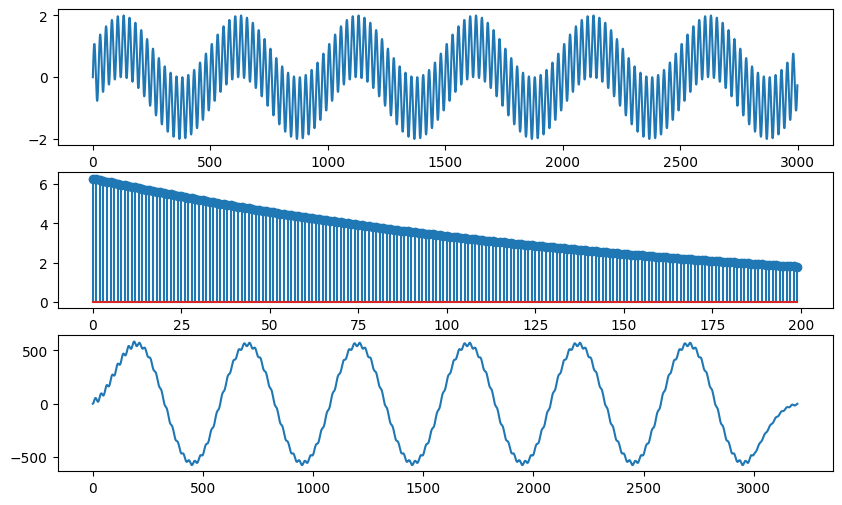

In [55]:
t = np.arange(0,3,0.001)
x = np.sin(2*np.pi*2*t) +  np.sin(2*np.pi*40*t)
fc = 1
RC = 1/(2*np.pi*fc)
h = (1/RC)*np.exp(-t[0:200]/RC) # respuesta al impulso de 1/(RCs+1); RC = 1/(2*pi*fc)


y = convolve(x,h)

plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
plt.plot(x)
plt.subplot(3,1,2)
plt.stem(h)
plt.subplot(3,1,3)
plt.plot(y)

## Usando transformada de fourier

/var/folders/89/43ylvgyx5hj4v_z5nn_dl1980000gn/T/ipykernel_5116/1341111142.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  y[0:int(N/2)] = y_[int(N/2):N]
/var/folders/89/43ylvgyx5hj4v_z5nn_dl1980000gn/T/ipykernel_5116/1341111142.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  y[int(N/2):N] = y_[0:int(N/2)]


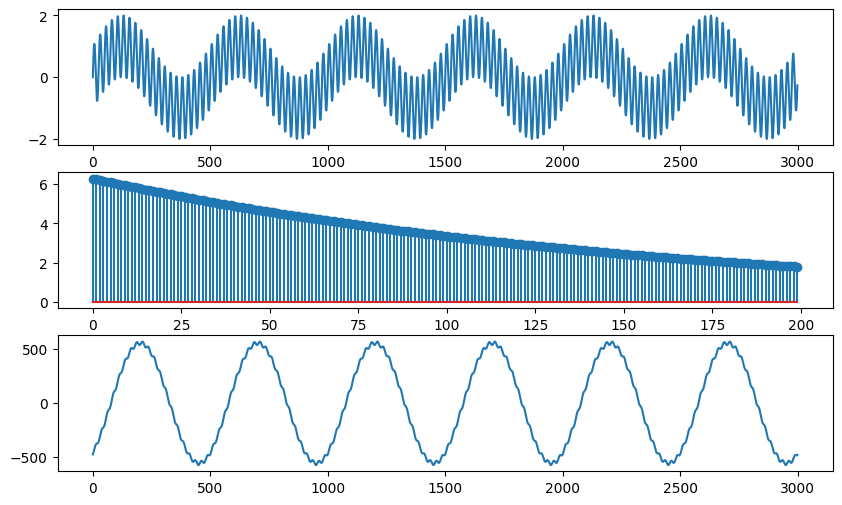

In [56]:
X_ = fft(x,3000)
H_ = fft(h,3000)

Y_ = X_*H_

y_ = ifft(Y_)
N = len(y_)
y = np.zeros(N)
y[0:int(N/2)] = y_[int(N/2):N]
y[int(N/2):N] = y_[0:int(N/2)]

plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
plt.plot(x)
plt.subplot(3,1,2)
plt.stem(h)
plt.subplot(3,1,3)
plt.plot(np.real(y))

0.15915494309189535


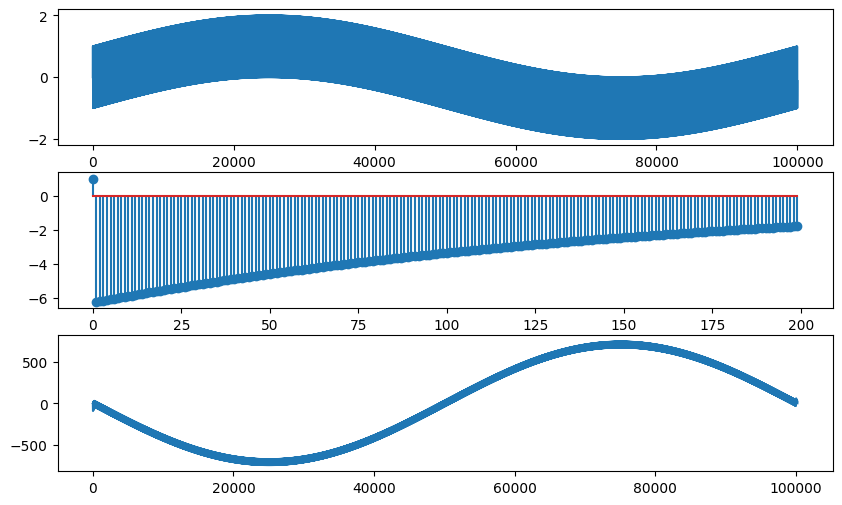

In [67]:
t = np.arange(0,100,0.001)
x = np.sin(2*np.pi*0.01*t) +  np.sin(2*np.pi*20*t)
fc = 1
RC = 1/(2*np.pi*fc)
print(RC)
h = (-1/RC)*np.exp(-t[0:200]/RC) # respuesta al impulso de RCs/(RCs+1)
h[0] = 1 

y = convolve(x,h)

plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
plt.plot(x)
plt.subplot(3,1,2)
plt.stem(h)
plt.subplot(3,1,3)
plt.plot(y)


